In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [ ]:
uploaded = files.upload()

Saving Train.csv to Train.csv


In [ ]:
df = pd.read_csv('Train.csv')

# 1. Modeling (70 poin)

Lakukan modeling sesuai task yang ditentukan di awal dari hasil data yang telah dilakukan preprocessing dan cleaning pada tahapan sebelumnya:

# Model 1

In [ ]:
# preprocessing umum (hapus duplicate dan handle missing value)

# Cek jumlah duplikat row dari semua kolom
df.duplicated().sum()

0

In [ ]:
# cek apakah ada kolom yang terdapat missing value
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

## Preprocessing Data (Tidak diminta di soal namun perlu dilakukan)

### buang fitur yang tidak akan digunakan

In [ ]:
df = df.drop(columns = 'ID', axis=1)

### Preprocessing untuk tipe data numeric

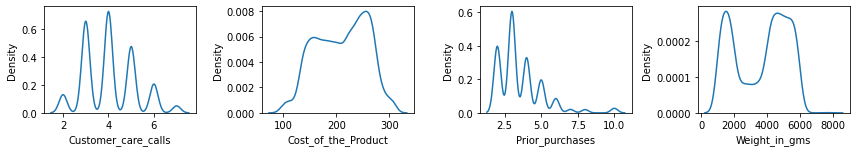

In [ ]:
# melakukan preprocessing untuk data

num = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Weight_in_gms']
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.kdeplot(data=df[num], x=df[column])
    plt.tight_layout()

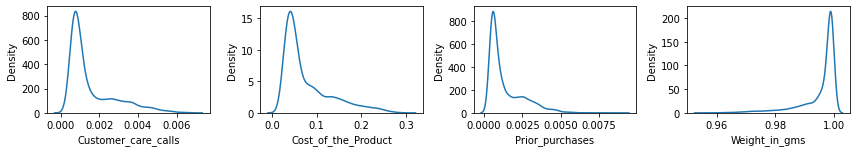

In [ ]:
from sklearn.preprocessing import Normalizer
num = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Weight_in_gms']
features = df[num]

scaler = Normalizer(norm = 'l2')
# norm = 'l2' is default

df[num] = scaler.fit_transform(features.values)

plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.kdeplot(data=df, x=df[column])
    plt.tight_layout()

### Preprocessing untuk tipe data categorical

In [ ]:
# Label Encoding
mapping_Product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2
}

mapping_Gender = {
    'F' : 0,
    'M' : 1
}

df['Product_importance'] = df['Product_importance'].map(mapping_Product_importance)
df['Gender'] = df['Gender'].map(mapping_Gender)

# one hot encoding
for cat in ['Mode_of_Shipment', 'Warehouse_block']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

# drop kolom yang di encoding menggunakan OHE : 'Mode_of_Shipment' & 'Warehouse_block'
df = df.drop(columns=['Mode_of_Shipment', 'Warehouse_block'])

In [ ]:
df

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
0,0.003211,2,0.142095,0.002408,0,0,44,0.989845,1,1,0,0,0,0,0,1,0
1,0.001292,5,0.069778,0.000646,0,1,59,0.997562,1,1,0,0,0,0,0,0,1
2,0.000592,2,0.054159,0.001184,0,1,48,0.998531,1,1,0,0,1,0,0,0,0
3,0.002521,3,0.147887,0.003361,1,1,10,0.988995,1,1,0,0,0,1,0,0,0
4,0.000803,2,0.073872,0.001204,1,0,46,0.997267,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,0.002567,1,0.161692,0.003208,1,0,1,0.986833,1,0,0,1,1,0,0,0,0
10995,0.003154,1,0.182906,0.003942,1,0,6,0.983118,0,0,0,1,0,1,0,0,0
10996,0.004237,4,0.205067,0.004237,0,0,4,0.978730,0,0,0,1,0,0,1,0,0
10997,0.004064,2,0.181242,0.004876,1,1,2,0.983418,0,0,0,1,0,0,0,0,1


## A. Split Data Train & Test

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['Reached.on.Time_Y.N'], axis=1)
y = df['Reached.on.Time_Y.N']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Preprocessing data train lanjutan

In [ ]:
y_train.value_counts(normalize=True)

1    0.597568
0    0.402432
Name: Reached.on.Time_Y.N, dtype: float64

In [ ]:
# oversampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_over, y_over = sm.fit_resample(x_train, y_train.ravel())

## B. Modeling

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier

def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, model):
  best_model = model
  model.fit(X_train_data, y_train_data)
  
  pred = model.predict(X_test_data)
  score = roc_auc_score(y_test_data, pred)
  return [best_model, pred, score]

models_to_train = [LogisticRegression(), 
                   KNeighborsClassifier(), 
                   DecisionTreeClassifier(), 
                   RandomForestClassifier(), 
                   AdaBoostClassifier(), 
                   XGBClassifier(),
                   LGBMClassifier()
                  ]

models_preds_scores = []

for i, model in enumerate(models_to_train):
    result = algorithm_pipeline(x_over, x_test, y_over, y_test,  model)
    models_preds_scores.append(result)

for result in models_preds_scores:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2])) # score in training data

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Model: LogisticRegression, Score: 0.6738478991416769
Model: KNeighborsClassifier, Score: 0.6359125837453713
Model: DecisionTreeClassifier, Score: 0.6211712579464458
Model: RandomForestClassifier, Score: 0.6940752156510199
Model: AdaBoostClassifier, Score: 0.7159999143817292
Model: XGBClassifier, Score: 0.7185855861640874
Model: LGBMClassifier, Score: 0.6969455681842506


Dari data diatas didapatkan bahwa XGBoost merupakan model terbaik dengan nilai ROC_AUC 71,85%

In [ ]:
XGB = XGBClassifier()
XGB.fit(x_over, y_over)

XGBClassifier()

## C. Model Evaluation : Pemilihan dan perhitungan metrics model

In [ ]:
def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_over)
  
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_over, y_pred_train))
    
def confusionmatrix(predictions):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

In [ ]:
eval_classification(XGB)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.95
Recall (Test Set): 0.48
F1-Score (Test Set): 0.63
roc_auc (test-proba): 0.72
roc_auc (train-proba): 0.73


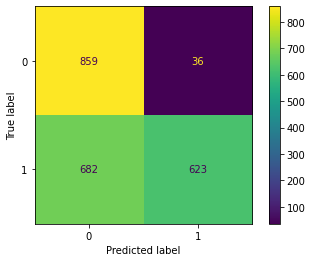

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

predictions = XGB.predict(x_test)
confusionmatrix(predictions)

## D. Model Evaluation: Apakah model sudah best-fit? Hindari Overfit/Underfit. Validasi dengan cross-validation


In [ ]:
cross_validation = XGBClassifier(cv=5)
cross_validation.fit(x_over, y_over)

eval_classification(cross_validation)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.95
Recall (Test Set): 0.48
F1-Score (Test Set): 0.63
roc_auc (test-proba): 0.72
roc_auc (train-proba): 0.73


## E. Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='precision')
xg_tuned.fit(x_over,y_over)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.88
Recall (Test Set): 0.53
F1-Score (Test Set): 0.66
roc_auc (test-proba): 0.71
roc_auc (train-proba): 0.77


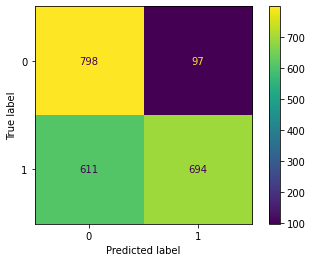

In [ ]:
predictions = xg_tuned.predict(x_test)
confusionmatrix(predictions)

# 2.Feature Importance (Model Terbaik)

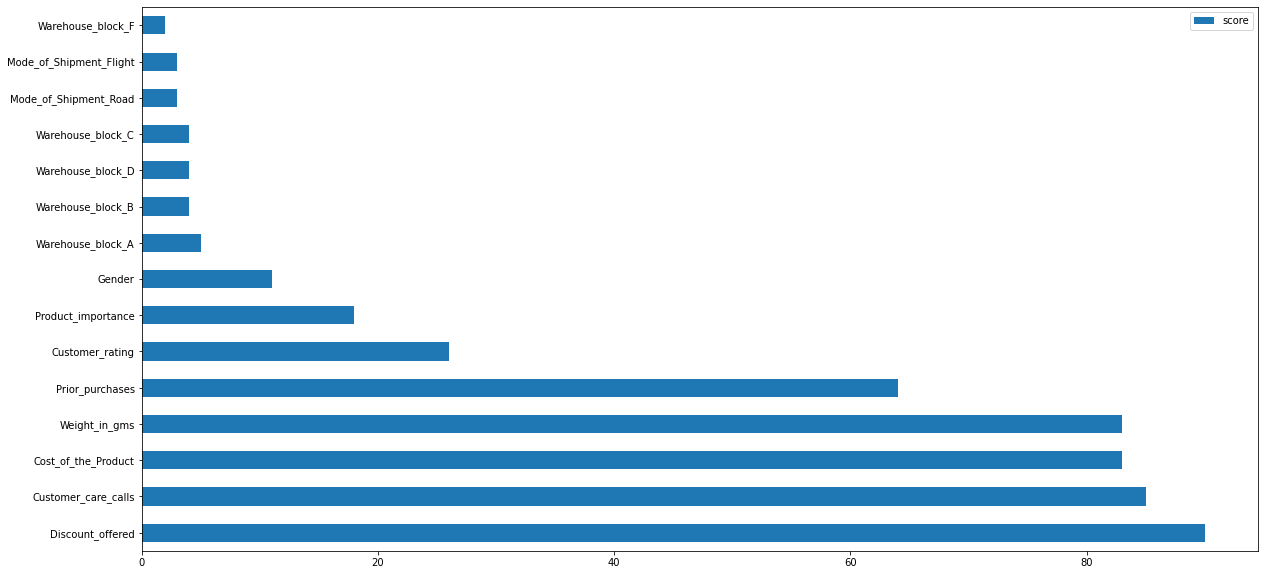

In [ ]:
feature_important = XGB.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

*Pada* modeling ini kita memilih model terbaik yaitu XGBClassifier, model ini memiliki nilai precision 88% setelah kita hyperparameter tuning. <br>

Fitur penting yang digunakan dalam modelling:

- hampir semuanya feature digunakan pada modeling kecuali ID


Business Insight

1. Cukup banyak keterlambatan yang terjadi pada pesanan barang dengan diskon diatas 10%. 
2. Berat barang pada rentang 2-4 kg mengalami keterlambatan yang terlampau sering.
3. Terjadi penumpukan barang di Warehous F, sehingga terjadi banyaknya barang yang telat dari warehouse F
4. Jumlah Customer care calls mempengaruhi apakah barang akan terlambat atau tidak, dimana berdasarkan pengerjaan tugas yang lalu semakin banyak customer care calls yang dilakukan pelanggan maka potensi barang datang terlambat cukup besar.

Solusi:
1. Notifikasi otomatis melalui pesan singkat atau media telekomunikasi lainnya apabila pengiriman diprediksi akan terlambat.
2. Sebagai ganti rugi atas keterlambatan pengiriman, perusahaan dapat memberikan kupon gratis. Misalnya, kupon gratis ongkir hingga X nominal.
3. Memberikan Rekomendasi kepada customer Mode of Shipment berdasarkan berat dan product importance.
4. Mengkoordinir setiap warehouse supaya tidak terjadi penumpukan barang di setiap warehousenya, sehingga barang keluar warehouse tidak banyak birokrasi yang berbelit-belit.
5. Sebelum mengirimkan barang, maka alangkah baiknya diuji terlebih dahulu apakah barang akan terlambat atau tidak, jika terlambat maka estimasi waktu pengiriman dapat ditambah.